## Assignment 4: Transformer Language Model (With Answers)

### *CS 4770 Natural Language Processing (Fall 2025)*

In this assignment, you will work with Transformer-based language models, specifically BERT, using Python and the Hugging Face transformers library. You will explore tokenization, contextual word representations, prompting techniques, and fine-tuning for text classification. The focus of this assignment is on applying pre-built tools and methods to understand and leverage BERT’s capabilities in various natural language processing tasks.

### Tasks
1. **Tokenization with BERT**: Use the BertTokenizer to segment text sequences and analyze BERT’s vocabulary.
2. **Word Sense Disambiguation with BERT**: Compute and visualize cosine similarity between contextual word representations.
3. **Prompting BERT**: Experiment with masked language modeling for tasks like topic classification, sentiment analysis, and factual knowledge probing.
4. **Fine-tuning BERT for Classification**: Implement and evaluate a fine-tuned BERT model using a small text classification dataset.

### Note
Remember to delete ```raise NotImplementedError``` before completing the TODOs.


In [2]:
# Import some essential packages
import numpy as np
import torch

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## 1. Tokenization with BertTokenizer

TODO: Use the `BertTokenizer` from the Hugging Face `transformers` library to tokenize the given text sequence.


In [3]:
from transformers import BertTokenizer

# Load the pre-trained BERT tokenizer
tokenizer: BertTokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

c:\Users\User\Projects\UVA\NLP\assignments\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Tokenize the input text
texts = ["Pretrained language models can be fine-tuned for a wide range of downstream tasks.",
         "Embeddings turn words into numerical vectors."]

for text in texts:
  tokens = tokenizer.tokenize(text)

  print("Tokens:", tokens)

Tokens: ['pre', '##train', '##ed', 'language', 'models', 'can', 'be', 'fine', '-', 'tuned', 'for', 'a', 'wide', 'range', 'of', 'downstream', 'tasks', '.']
Tokens: ['em', '##bed', '##ding', '##s', 'turn', 'words', 'into', 'numerical', 'vectors', '.']


TODO: Count how many subword tokens in BERT's vocabulary start with "##".



In [5]:
subword_count = 0
for token in tokenizer.vocab:
    if token.startswith("##"):
        subword_count += 1

print("Number of subword tokens starting with '##':", subword_count)

Number of subword tokens starting with '##': 5828


## 2. Use BERT Representations for Word Sense Disambiguation

TODO: Use BERT's last layer representation to compute cosine similarity between different occurrences of polysemous words (words with multiple meanings) in different contexts.


In [6]:
import torch
from transformers import BertModel
import matplotlib.pyplot as plt

# Load pre-trained BERT model
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Example sentences with polysemous words
sentences = [
    "He swung the bat and hit a home run.",  # bat-1 (sports equipment)
    "She practiced her swing with a brand-new bat at the field.",  # bat-2 (sports equipment)
    "The player gripped the bat firmly before stepping up to the plate.",  # bat-3 (sports equipment)
    "A bat flew out of the cave at dusk.",  # bat-4 (flying mammal)
    "There was a bat resting behind the curtain in the attic.",  # bat-5 (flying mammal)
    "The bat hung upside down inside the cave.",  # bat-6 (flying mammal)
]

# Get BERT representations for each sentence
representations = []
token_indices = []
for sentence in sentences:
  inputs = tokenizer(sentence, return_tensors="pt")
  outputs = model(**inputs)
  last_hidden_states = outputs.last_hidden_state

  # Find the index of "bat" in the tokenized sentence
  token_index = inputs.input_ids[0].tolist().index(tokenizer.convert_tokens_to_ids('bat'))
  token_indices.append(token_index)

  # Get the BERT representation of "bat"
  representation = last_hidden_states[0][token_index].detach().numpy()
  representations.append(representation)

# Compute cosine similarity
num_sentences = len(sentences)
similarity_matrix = np.zeros((num_sentences, num_sentences))
for i in range(num_sentences):
  for j in range(num_sentences):
    vec1 = representations[i]
    vec2 = representations[j]

    # TODO: compute cosine similarity between vec1 and vec2
    similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    similarity_matrix[i][j] = similarity

# print the Cosine similarity between 'bank' occurrences in different sentences
print(f"Cosine similarity matrix:\n{similarity_matrix}")


Cosine similarity matrix:
[[1.         0.71235299 0.87386417 0.46207899 0.47927818 0.46908197]
 [0.71235299 1.         0.77146506 0.5662033  0.59025013 0.60473078]
 [0.87386417 0.77146506 1.         0.47283253 0.50191188 0.53871059]
 [0.46207899 0.5662033  0.47283253 1.         0.84946209 0.83707368]
 [0.47927818 0.59025013 0.50191188 0.84946209 1.         0.8189137 ]
 [0.46908197 0.60473078 0.53871059 0.83707368 0.8189137  1.        ]]


TODO: Plot the pairwise cosine similarity of different polysemy occurrences.

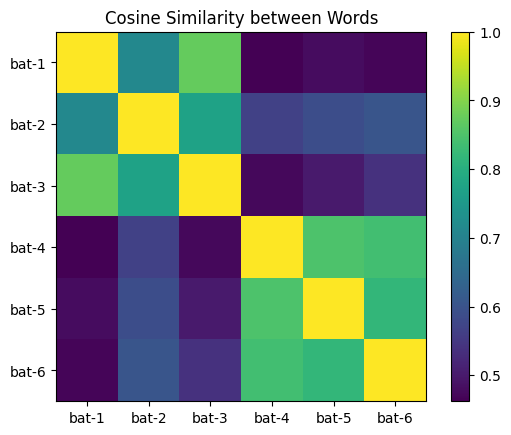

<Figure size 1000x1000 with 0 Axes>

In [7]:
# TODO: visualize similarity matrix
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')

plt.colorbar()
plt.xticks(np.arange(len(sentences)), [f'bat-{i+1}' for i in range(len(sentences))])
plt.yticks(np.arange(len(sentences)), [f'bat-{i+1}' for i in range(len(sentences))])
plt.title("Cosine Similarity between Words")
plt.figure(figsize=(10, 10))
plt.show()

TODO: Visualize these representations using a 2D scatter plot.

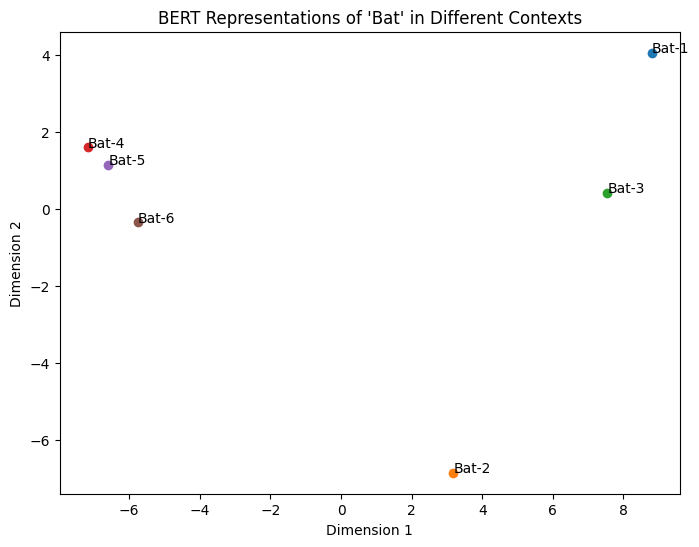

<Figure size 1000x1000 with 0 Axes>

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_representations = pca.fit_transform(np.array(representations)) # 2D representation

# Visualize the representations
plt.figure(figsize=(8, 6))
for i, representation in enumerate(reduced_representations):
  # TODO: use plt.scatter() to draw the scatter plot
  plt.scatter(representation[0], representation[1])

  # add text to each point in the plot
  plt.text(representation[0], representation[1], f"Bat-{i + 1}")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("BERT Representations of 'Bat' in Different Contexts")
plt.figure(figsize=(10, 10))
plt.show()

## 3. Prompting BERT for NLP tasks

TODO: Use BERT to fill in the blanks in sentences using the masked language modeling approach, and apply it for NLP tasks such as topic classification, sentiment classification, and factual knowledge probing.



In [9]:
from transformers import pipeline

# Load fill-mask pipeline with BERT
model = pipeline('fill-mask', model='bert-base-uncased', device=model.device)

# Use BERT to predict masked words
def predict_masked_words(sentences, model):
  for idx, sentence in enumerate(sentences):
      # TODO: use loaded pipeline model to complete the sentence
      predictions = model(sentence)

      print(f"Prediction {idx}:\n{predictions[0]}\n")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


- **Topic Classification**


In [10]:
# Example Prompts for Topic Classification
sentences = [
   "Quantum mechanics and relativity are important theories in [MASK].",
   "Climate change and global warming are important issues in [MASK].",
   "The study of planets and galaxies belongs to the field of [MASK]."
]

# TODO: call predict_masked_words() to make predictions
predict_masked_words(sentences, model)

Prediction 0:
{'score': 0.7033661603927612, 'token': 5584, 'token_str': 'physics', 'sequence': 'quantum mechanics and relativity are important theories in physics.'}

Prediction 1:
{'score': 0.06632234901189804, 'token': 4331, 'token_str': 'politics', 'sequence': 'climate change and global warming are important issues in politics.'}

Prediction 2:
{'score': 0.8669745922088623, 'token': 12799, 'token_str': 'astronomy', 'sequence': 'the study of planets and galaxies belongs to the field of astronomy.'}



- **Sentiment Classification**


In [11]:
# Example Prompts for Sentiment Classification
sentences = [
    "I [MASK] the service at this restaurant, it exceeded my expectations.",
    "Her performance in the play was outstanding, everyone was [MASK].",
    "Her kind words made me feel genuinely [MASK]."
]

# TODO: call predict_masked_words() to make predictions
predict_masked_words(sentences, model)

Prediction 0:
{'score': 0.42196187376976013, 'token': 3866, 'token_str': 'loved', 'sequence': 'i loved the service at this restaurant, it exceeded my expectations.'}

Prediction 1:
{'score': 0.14038880169391632, 'token': 24867, 'token_str': 'cheering', 'sequence': 'her performance in the play was outstanding, everyone was cheering.'}

Prediction 2:
{'score': 0.24026870727539062, 'token': 3407, 'token_str': 'happy', 'sequence': 'her kind words made me feel genuinely happy.'}



- **Factual Knowledge Probing**

In [12]:
# Example Prompts for Factual Knowledge Probing
sentences = [
    "The capital of UK is [MASK].",
    "The currency used in Japan is the [MASK].",
    "Mount [MASK] is the highest peak in the world."
]

# TODO: call predict_masked_words() to make predictions
predict_masked_words(sentences, model)

Prediction 0:
{'score': 0.21299394965171814, 'token': 2414, 'token_str': 'london', 'sequence': 'the capital of uk is london.'}

Prediction 1:
{'score': 0.8760938048362732, 'token': 18371, 'token_str': 'yen', 'sequence': 'the currency used in japan is the yen.'}

Prediction 2:
{'score': 0.19116565585136414, 'token': 23914, 'token_str': 'everest', 'sequence': 'mount everest is the highest peak in the world.'}



## 4. Fine-tuning BERT for Text Classification


TODO: Fine-tune a BERT model using the provided training data on a text classification (e.g., sentiment classification) task.

In the following example, we use the IMDB binary sentiment classification task, where label `0` represents negative sentiment and `1` represents positive sentiment.



In [13]:
from datasets import load_dataset
from transformers import Trainer, TrainingArguments
from transformers import BertForSequenceClassification, AutoTokenizer

# Load a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Load a small text classification dataset (e.g., IMDB binary sentiment classification task)
dataset = load_dataset('imdb', split='train').shuffle(seed=42).select(range(1000))
dataset = dataset.train_test_split(test_size=0.2)

# Define a function to tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Apply the tokenize function to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 200/200 [00:00<00:00, 755.58 examples/s]


In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    eval_strategy="epoch",
    logging_dir='./logs',
    report_to="none" # Disable wandb reporting
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
)

eval_log = None
# TODO: fine-tune and evaluate the BERT model using trainer.train() and trainer.evaluate()
trainer.train()
eval_log = trainer.evaluate()

print(f'Evaluation Log: {eval_log}')

c:\Users\User\Projects\UVA\NLP\assignments\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


## Evaluate the fine-tuned BERT model

Below is a demo of using the above fine-tuned BERT model for sentiment classification. No need to present the results in this block.

In [ ]:
# Example test cases
test_sentences = [
    "This movie was fantastic!",
    "I hated this book.",
    "The service was terrible.",
    "The food was delicious."
]

# Tokenize the test sentences
inputs = tokenizer(test_sentences, padding=True, truncation=True, return_tensors="pt").to(model.device)

# Get model predictions
outputs = model(**inputs)

# Apply softmax to get probabilities
probabilities = torch.softmax(outputs.logits, dim=1)
predictions = torch.argmax(probabilities, dim=1)

# Print the predictions
for i, sentence in enumerate(test_sentences):
  print(f"Sentence: {sentence}")
  print(f"Prediction: {predictions[i].item()}")
  print("-" * 20)

TODO: evalute the fine-tuned BERT model on the test set and report the accuracy

In [ ]:
correct_predictions = 0
test_data = tokenized_datasets['test']
total_predictions = len(test_data)

wrong_prediction_sentences = []

# Iterate through the test dataset
for i in range(total_predictions):
  label = test_data[i]['label']
  inputs = tokenizer([test_data[i]['text']], padding=True, truncation=True, return_tensors="pt").to(model.device)

  # TODO (for problem 4(b)): Use the fine-tuned model to get a prediction for the test sentence
  outputs = model(**inputs)
  probabilities = torch.softmax(outputs.logits, dim=1)
  prediction = torch.argmax(probabilities, dim=1).item()

  if prediction == label:
    correct_predictions += 1
  # TODO (for problem 4(c)): collect sentences from the test set for which the fine-tuned BERT model made wrong predictions
  if prediction != label:
      wrong_prediction_sentences.append(test_data[i]['text'])


print(f"Total correct predictions: {correct_predictions}")
print(f"Total predictions: {total_predictions}")
accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {accuracy}")